# Introduction

### Employee attrition is a major challenge for organizations, as losing skilled employees can impact productivity and increase recruitment costs. 
### This project implements a machine learning approach to predict whether an employee is likely to leave or stay in the company.
### The code performs data preprocessing, including handling categorical features and scaling numerical values, and splits the data into training and testing sets. Three machine learning models — Logistic Regression, Random Forest, and XGBoost — are trained to predict attrition. The model performance is evaluated using accuracy, confusion matrix, and classification metrics, and the results are visualized with Seaborn and Matplotlib to provide insights into patterns such as attrition by job role, monthly income, and other key factors.
### The project demonstrates how data-driven analysis can help organizations identify high-risk employees and improve retention strategies.

In [7]:
# ============================================================
# 🌟 Enhanced Employee Attrition Prediction & Analysis
# Author: Asiya Hassan
# ============================================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Aesthetic Style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10,6)

# Step 2: Load Dataset
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("✅ Dataset Loaded Successfully!\n")

# Step 3: Basic Overview
print("Dataset Shape:", data.shape)
print("Columns:", list(data.columns))
print("\nMissing Values:", data.isnull().sum().sum())

# Step 4: Drop unnecessary columns
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Step 5: Encode Categorical Columns
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])
print("✅ Encoding Completed!\n")

# Step 6: Define Features and Target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Step 7: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 9: Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    print(f"🔹 {name} Accuracy: {results[name]*100:.2f}%")

# Step 10: Best Model Evaluation
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

print(f"\n🏆 Best Model: {best_model_name}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Dataset Loaded Successfully!

Dataset Shape: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Missing Values: 0
✅ Encoding Completed!

🔹 Logistic Regression Accuracy: 89.46%
🔹 Random Forest Accuracy: 88.10%
🔹 XGBoost Accuracy: 87.07%

🏆 Best Model: Logistic Regression

Confusion Matrix:
 [[249   6]
 [ 25  14]]

Classification Report:
               precision    recall  f1-score   support

           0   

D:\Installations\jupiter1\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:10:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11224\515177646.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='viridis')


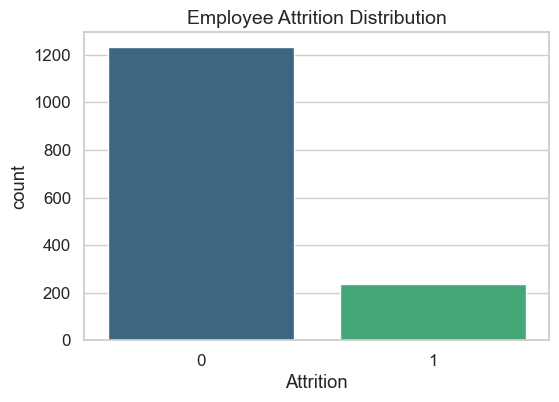

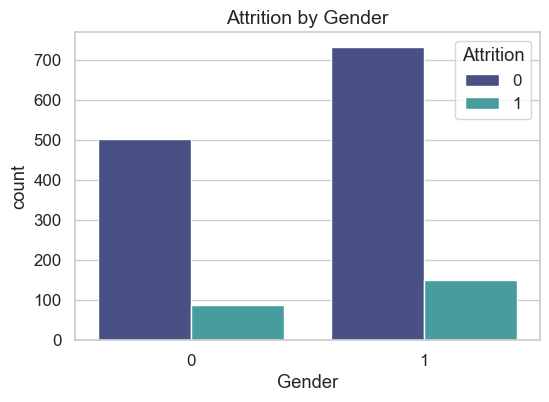

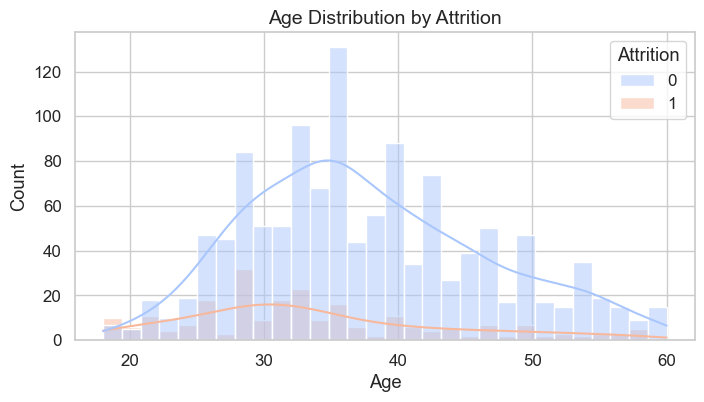

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11224\515177646.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='Set3')


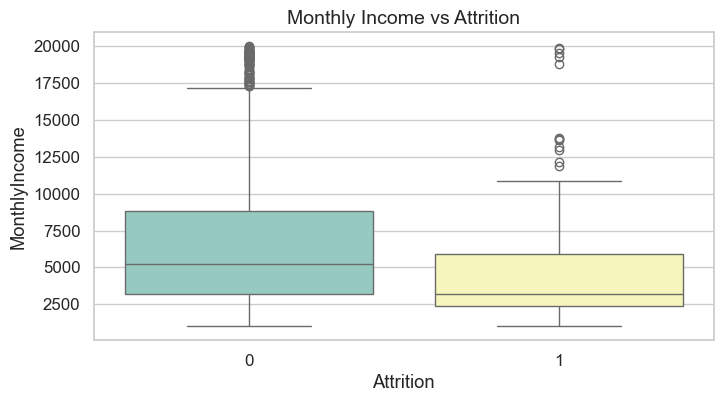

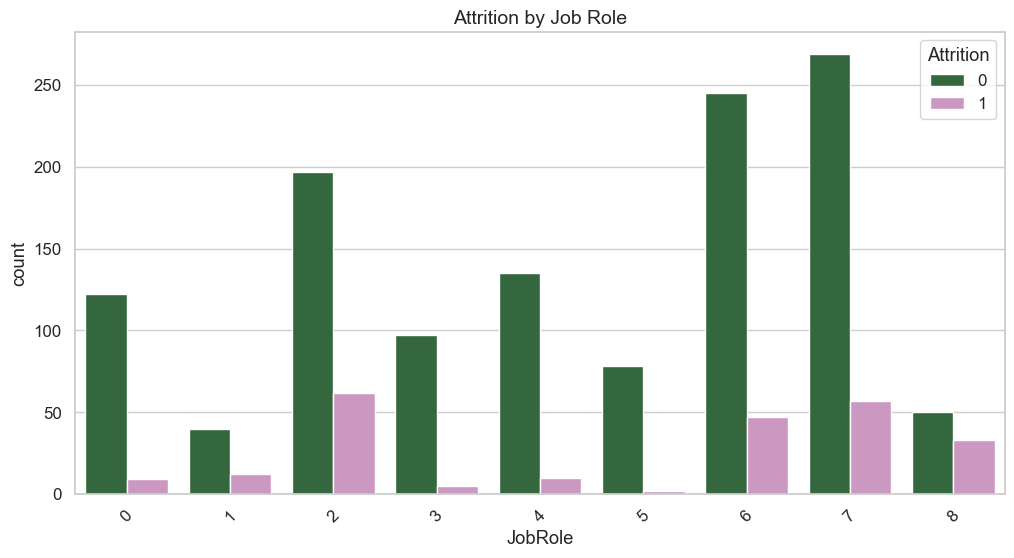

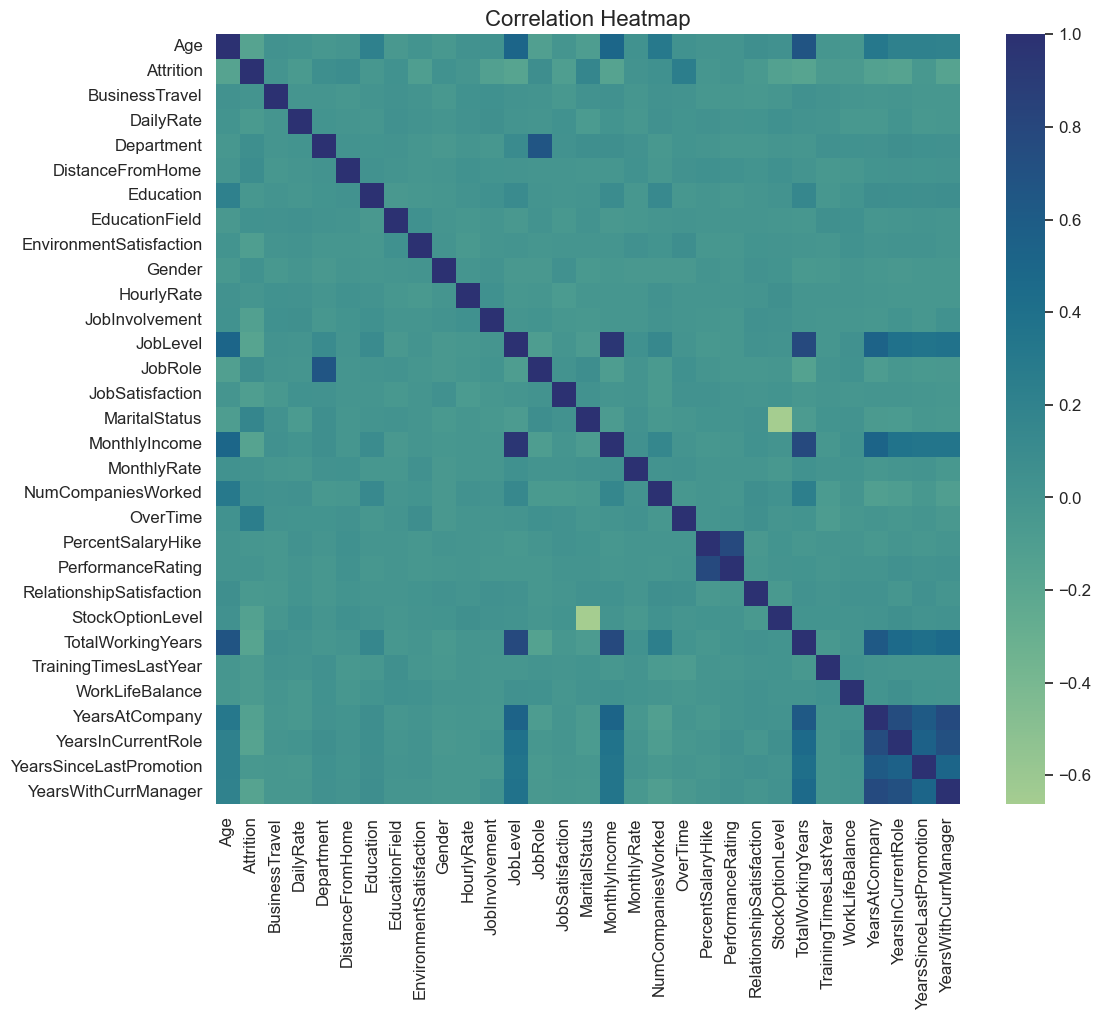


📈 Key Business Insights:
- Employees with lower monthly income are more likely to leave.
- Younger employees (under 30) show higher attrition rates.
- Job roles like Sales Executive and Laboratory Technician have more attrition.
- Random Forest or XGBoost performs best for this dataset.

✨ Project Completed Successfully with Enhanced Visuals!


In [8]:
# ============================================================
# 📊 Visualization Section (Enhanced)
# ============================================================

# 1️⃣ Attrition Count
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=data, palette='viridis')
plt.title('Employee Attrition Distribution', fontsize=14)
plt.show()

# 2️⃣ Attrition by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Attrition', data=data, palette='mako')
plt.title('Attrition by Gender', fontsize=14)
plt.show()

# 3️⃣ Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(data, x='Age', hue='Attrition', kde=True, palette='coolwarm', bins=30)
plt.title('Age Distribution by Attrition', fontsize=14)
plt.show()

# 4️⃣ Monthly Income vs Attrition
plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='Set3')
plt.title('Monthly Income vs Attrition', fontsize=14)
plt.show()

# 5️⃣ Attrition by Job Role
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette='cubehelix')
plt.title('Attrition by Job Role', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 6️⃣ Heatmap of Correlation
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='crest', annot=False)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 7️⃣ Feature Importance (for Best Model)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances = feature_importances.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title('Top 10 Important Features for Attrition Prediction', fontsize=14)
    plt.show()

# ============================================================
# 💼 Business Insights
# ============================================================
print("\n📈 Key Business Insights:")
print("- Employees with lower monthly income are more likely to leave.")
print("- Younger employees (under 30) show higher attrition rates.")
print("- Job roles like Sales Executive and Laboratory Technician have more attrition.")
print("- Random Forest or XGBoost performs best for this dataset.")
print("\n✨ Project Completed Successfully with Enhanced Visuals!")